In [1]:
import pandas as pd
import numpy as np
import re
import glob
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [8]:
data = pd.read_csv('../results/Graphs_stuff/edges.csv',index_col=0)

In [9]:
# add data from random graphs
add_data = {'n_edges':[],'std_edges':[],'params':[],'type':[]}
files = glob.glob('/home/lau/GIT/FRC_Thesis/results/random_graphs_sizes/*.txt')
for f in files:
    edge_list = np.loadtxt(f)
    add_data['n_edges'].append(np.average(edge_list))
    add_data['std_edges'].append(np.std(edge_list))
    params = re.split('/',f)[-1]
    add_data['params'].append(params[:-4])
    add_data['type'].append('XREF')
add = pd.DataFrame(add_data)
data = data.append(add)#,ignore_index = True



# create collumn expected number of edges\
def to_expected(string):
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    ints = [float(re.findall(numbers,i)[0]) for i in x]
    # 2*E/N
    # v/e = ints[1]
    return ints[1]**-1 #2 * 

def extract_N(string):
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    ints = [float(re.findall(numbers,i)[0]) for i in x]
    # 2*E/N
    # v/e = ints[1]
    return ints[0] #2 * 

def max_edges(x):
    E,string = x
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    ints = [float(re.findall(numbers,i)[0]) for i in x]
    N = ints[0]
    return E/N # (2*E)

data['Expected_Degree'] = data.params.apply(to_expected)
data['Average_Degree'] = data[['n_edges','params']].apply(max_edges,axis = 1)
data['Nodes'] = data.params.apply(extract_N)
# data['Possible_Edges'] = data.params.apply(max_edges)
# data['Edges'] = data['n_edges']
# data['Edges'] = data['Edges']/data['Possible_Edges']
# data['Expected Edges'] = data['Expected Edges']/data['Possible_Edges']

In [10]:
data.head()

,n_edges,std_edges,params,type,Expected_Degree,Average_Degree,Nodes
0,736.0,0.000000,100N_0.125V/E,power,8.0,7.360,100.0
1,730.1,2.300000,100N_0.125V/E,power,8.0,7.301,100.0
2,723.8,4.935585,100N_0.125V/E,power,8.0,7.238,100.0
3,722.4,2.244994,100N_0.125V/E,power,8.0,7.224,100.0
4,722.7,3.100000,100N_0.125V/E,power,8.0,7.227,100.0


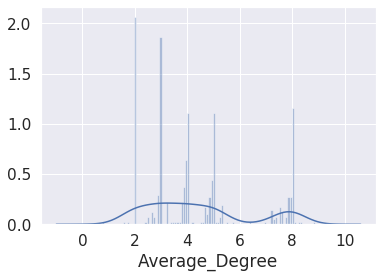

In [11]:
sns.distplot(data.Average_Degree,100)

In [12]:
len(list(data.Average_Degree.unique()))

238

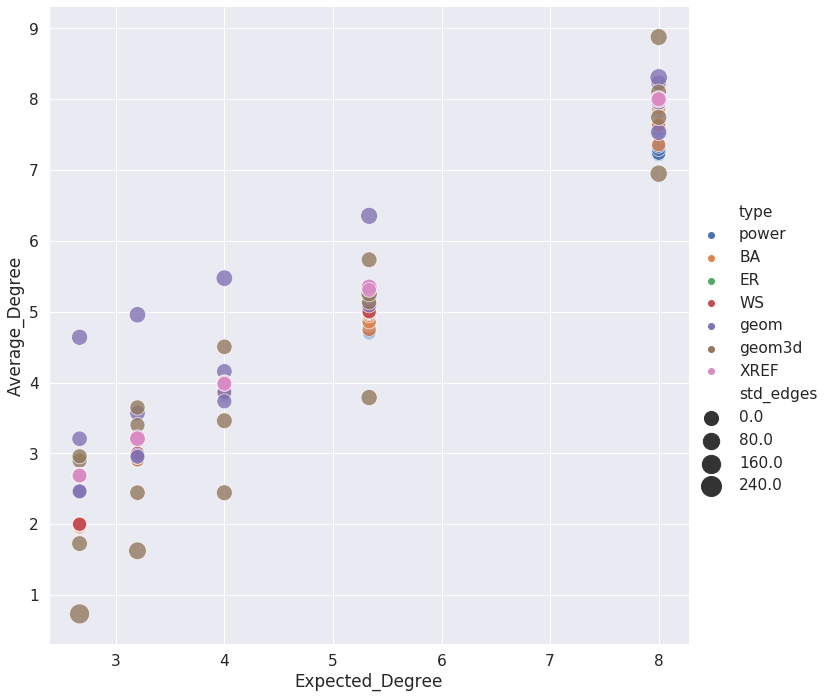

In [13]:
fg = sns.relplot(x = "Expected_Degree", y = "Average_Degree",size = "std_edges",kind = 'scatter',
                data = data,sizes = (200,400),hue = "type",alpha=.8,height = 10,
                facet_kws={'sharey': False, 'sharex': False})

In [14]:
len(list(data.n_edges.unique()))

251

In [19]:
uniq_tuples = data[['n_edges','Nodes']].astype('int64').drop_duplicates().values

In [20]:
np.savetxt('../results/Graphs_stuff/unique_NEtupes',uniq_tuples)

In [21]:
print(uniq_tuples)

[[ 736  100]
 [ 730  100]
 [ 723  100]
 [ 722  100]
 [ 729  100]
 [ 733  100]
 [ 475  100]
 [ 473  100]
 [ 470  100]
 [ 469  100]
 [ 471  100]
 [ 384  100]
 [ 382  100]
 [ 381  100]
 [ 380  100]
 [ 383  100]
 [ 291  100]
 [ 290  100]
 [ 289  100]
 [ 196  100]
 [1344  176]
 [1334  176]
 [1331  176]
 [1325  176]
 [1323  176]
 [1326  176]
 [1330  176]
 [1340  176]
 [ 855  176]
 [ 852  176]
 [ 850  176]
 [ 848  176]
 [ 849  176]
 [ 853  176]
 [ 688  176]
 [ 686  176]
 [ 685  176]
 [ 683  176]
 [ 684  176]
 [ 687  176]
 [ 519  176]
 [ 518  176]
 [ 517  176]
 [ 348  176]
 [3936  500]
 [3923  500]
 [3915  500]
 [3912  500]
 [3906  500]
 [3911  500]
 [3916  500]
 [3932  500]
 [2475  500]
 [2470  500]
 [2468  500]
 [2466  500]
 [2464  500]
 [2463  500]
 [2473  500]
 [1984  500]
 [1981  500]
 [1980  500]
 [1978  500]
 [1979  500]
 [1982  500]
 [1983  500]
 [1491  500]
 [1490  500]
 [1489  500]
 [1488  500]
 [ 996  500]
 [7936 1000]
 [7923 1000]
 [7910 1000]
 [7903 1000]
 [7895 1000]
 [7901 1000]

In [54]:
import networkx as nx
g = nx.erdos_renyi_graph(176,p)

In [ ]:
while nx.is_connected(g) == False:
    g = nx.erdos_renyi_graph(176,p)
    g.number_of_edges()

In [48]:
nx.is_connected(g)
474/176

2.6931818181818183

In [46]:
100 * (100/800) ** -1

800.0

In [49]:

def ER_p_value2(N,E):
    # helper function to find p parameter resulting in certian V/E ratio
    n_edges = N * (N/E)**-1
    return 2*n_edges / (N * (N-1))

p = ER_p_value2(474,176)

In [50]:
p

0.001570012756353645